In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading Covid-19 dataset

In [2]:
covid=pd.read_csv("/Users/deepjain/python/covid_19_india.csv")
covid

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [3]:
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [4]:
covid.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [5]:
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [6]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [7]:
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,18110,18110,18110,18110
mean,9056,278638,4052,301031
std,5228,614891,10919,656149
min,1,0,0,0
25%,4528,3360,32,4377
50%,9056,33364,588,39774
75%,13583,278870,3644,300150
max,18110,6159676,134201,6363442


In [8]:
covid.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True,axis=1)

In [9]:
covid

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [10]:
statewise= pd.pivot_table(covid, values=['Confirmed','Cured','Deaths'], index='State/UnionTerritory', aggfunc=max)

/var/folders/bf/gt13gjnx66v6vhck07l9p51c0000gn/T/ipykernel_2017/211928460.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statewise= pd.pivot_table(covid, values=['Confirmed','Cured','Deaths'], index='State/UnionTerritory', aggfunc=max)


In [11]:
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


In [12]:
statewise['Recovery rate']= statewise['Cured']*100/statewise['Confirmed']
statewise['Mortality rate']= statewise['Deaths']*100/statewise['Confirmed']

In [13]:
statewise=statewise.sort_values(by='Confirmed', ascending=False)

In [14]:
statewise.style.background_gradient(cmap='cubehelix')

,Confirmed,Cured,Deaths,Recovery rate,Mortality rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


## Top 10 states with highest cases

In [15]:
top_10_states= covid.groupby(by='State/UnionTerritory').max()[['Confirmed']].sort_values(by=['Confirmed'], ascending=False).reset_index().head(10)
top_10_states

,State/UnionTerritory,Confirmed
0,Maharashtra,6363442
1,Maharashtra***,6229596
2,Kerala,3586693
3,Karnataka,2921049
4,Karanataka,2885238
5,Tamil Nadu,2579130
6,Andhra Pradesh,1985182
7,Uttar Pradesh,1708812
8,West Bengal,1534999
9,Delhi,1436852


/var/folders/bf/gt13gjnx66v6vhck07l9p51c0000gn/T/ipykernel_2017/4028975539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=top_10_states.iloc[:10],x= "State/UnionTerritory", y="Confirmed", linewidth=1,palette='Greens')


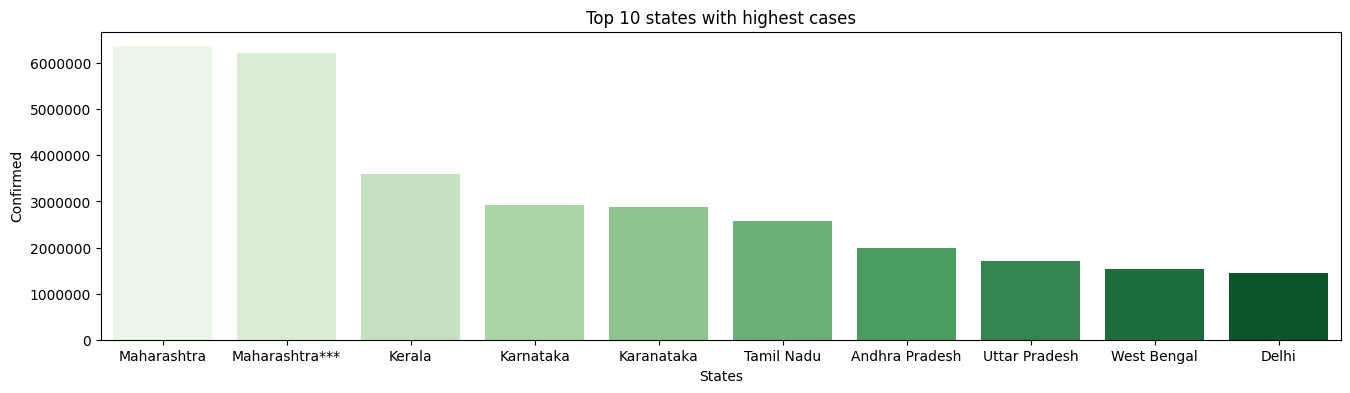

In [16]:
figure=plt.figure(figsize=(16,4))
plt.title("Top 10 states with highest cases")
ax=sns.barplot(data=top_10_states.iloc[:10],x= "State/UnionTerritory", y="Confirmed", linewidth=1,palette='Greens')
ax.ticklabel_format(style='plain',axis='y')
plt.xlabel("States")
plt.ylabel("Confirmed")
plt.show()

## Top 10 states with highest death.

In [17]:
top_10_states= covid.groupby(by='State/UnionTerritory').max()[['Deaths']].sort_values(by=['Deaths'], ascending=False).reset_index().head(10)
top_10_states

,State/UnionTerritory,Deaths
0,Maharashtra,134201
1,Maharashtra***,130753
2,Karnataka,36848
3,Karanataka,36197
4,Tamil Nadu,34367
5,Delhi,25068
6,Uttar Pradesh,22775
7,West Bengal,18252
8,Kerala,18004
9,Punjab,16322


/var/folders/bf/gt13gjnx66v6vhck07l9p51c0000gn/T/ipykernel_2017/649334170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=top_10_states.iloc[:10],x= "State/UnionTerritory", y="Deaths", linewidth=1,palette='Blues')


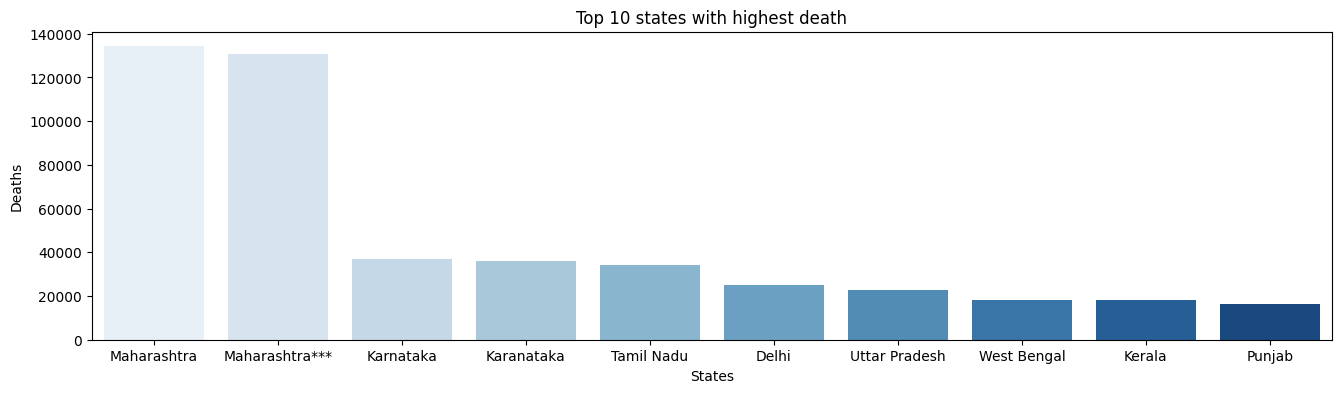

In [18]:
figure=plt.figure(figsize=(16,4))
plt.title("Top 10 states with highest death")
ax=sns.barplot(data=top_10_states.iloc[:10],x= "State/UnionTerritory", y="Deaths", linewidth=1,palette='Blues')
ax.ticklabel_format(style='plain',axis='y')
plt.xlabel("States")
plt.ylabel("Deaths")
plt.show()

## Growth Trends

<function matplotlib.pyplot.show(close=None, block=None)>

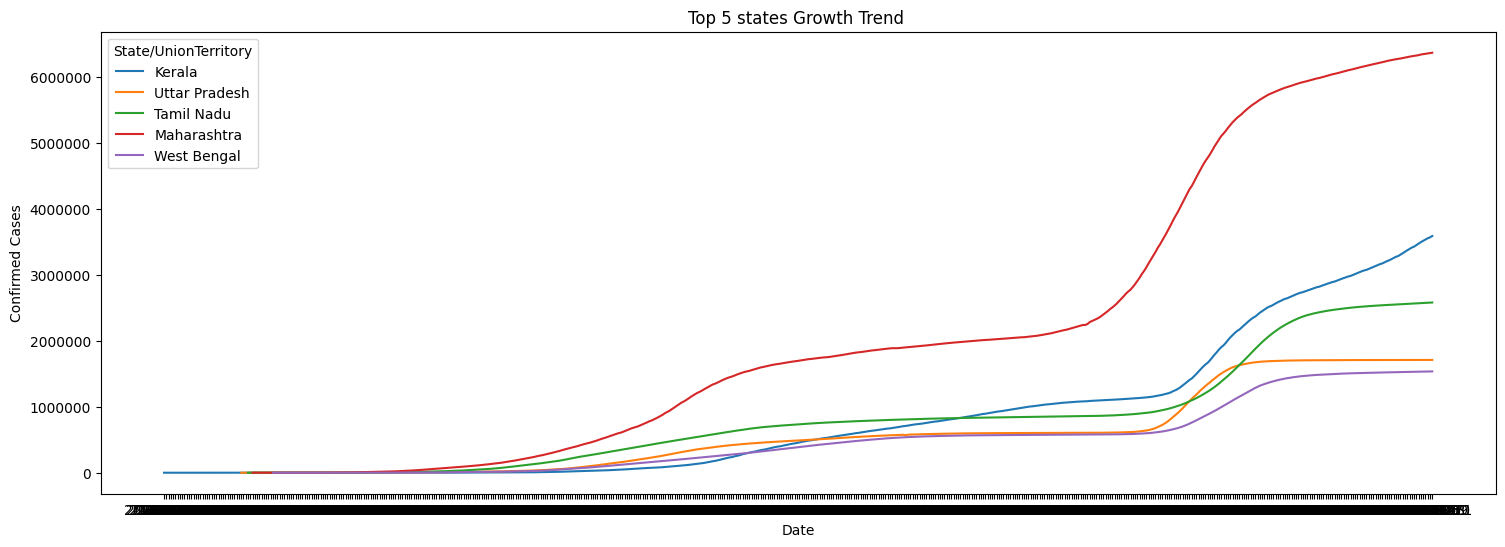

In [19]:
plt.figure(figsize=(18,6))
ax=sns.lineplot(data=covid[covid['State/UnionTerritory'].isin(['Maharashtra','Kerala','Tamil Nadu','Uttar Pradesh','West Bengal'])],x='Date',y='Confirmed',hue= 'State/UnionTerritory')
ax.ticklabel_format(style='plain',axis='y')
plt.title('Top 5 states Growth Trend ')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show

# Loading Vaccine dataset

In [20]:
vaccine=pd.read_csv('/Users/deepjain/python/covid_vaccine_statewise.csv')
vaccine

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276,3455,2957,48276,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757,24517,2,48276
1,17/01/2021,India,58604,8532,4954,58604,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348,31252,4,58604
2,18/01/2021,India,99449,13611,6583,99449,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361,58083,5,99449
3,19/01/2021,India,195525,17855,7951,195525,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901,113613,11,195525
4,20/01/2021,India,251280,25472,10504,251280,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111,153145,24,251280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
vaccine.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [22]:
vaccine.rename(columns={'Updated On':'Vaccine Date'},inplace=True)
vaccine.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)
vaccine.columns

Index(['Vaccine Date', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total'],
      dtype='object')

In [25]:
vac=vaccine.drop(columns=['Sputnik V (Doses Administered)','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [26]:
vac

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),AEFI,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
0,16/01/2021,India,48276,3455,2957,48276,0,NaN,NaN,NaN,579,47697,NaN,NaN,NaN,NaN,23757,24517,2,48276
1,17/01/2021,India,58604,8532,4954,58604,0,NaN,NaN,NaN,635,57969,NaN,NaN,NaN,NaN,27348,31252,4,58604
2,18/01/2021,India,99449,13611,6583,99449,0,NaN,NaN,NaN,1299,98150,NaN,NaN,NaN,NaN,41361,58083,5,99449
3,19/01/2021,India,195525,17855,7951,195525,0,NaN,NaN,NaN,3017,192508,NaN,NaN,NaN,NaN,81901,113613,11,195525
4,20/01/2021,India,251280,25472,10504,251280,0,NaN,NaN,NaN,3946,247334,NaN,NaN,NaN,NaN,98111,153145,24,251280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Male vs Female Vaccination

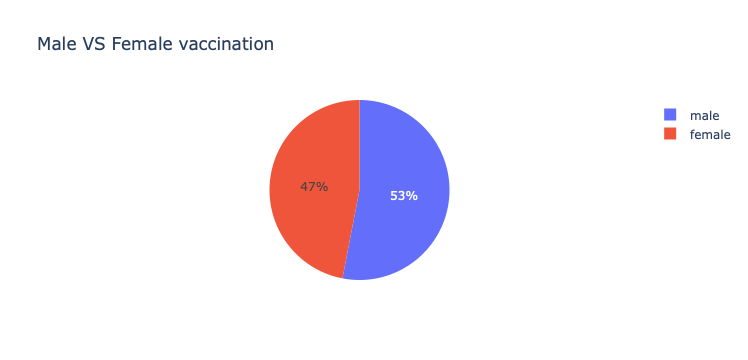

In [36]:
male=vac["Male(Individuals Vaccinated)"].sum()
female=vac["Female(Individuals Vaccinated)"].sum()
px.pie(names=['male','female'],values=[male,female],title='Male VS Female vaccination')

In [39]:
vac=vaccine[vaccine.State!='India']
vac.head(4)

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23,2,2,23,0,12,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
213,17/01/2021,Andaman and Nicobar Islands,23,2,2,23,0,12,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
214,18/01/2021,Andaman and Nicobar Islands,42,9,2,42,0,29,13,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42
215,19/01/2021,Andaman and Nicobar Islands,89,12,2,89,0,53,36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89


## Most Vaccinated State

In [42]:
most_vac=vac.groupby('State')['Total'].sum().to_frame('Total')
most_vac=most_vac.sort_values('Total',ascending=False)[:5]
most_vac


,Total
State,
Maharashtra,1403075494
Uttar Pradesh,1200575482
Rajasthan,1141162807
Gujarat,1078260544
West Bengal,925022706


/var/folders/bf/gt13gjnx66v6vhck07l9p51c0000gn/T/ipykernel_2017/2634847785.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<function matplotlib.pyplot.show(close=None, block=None)>

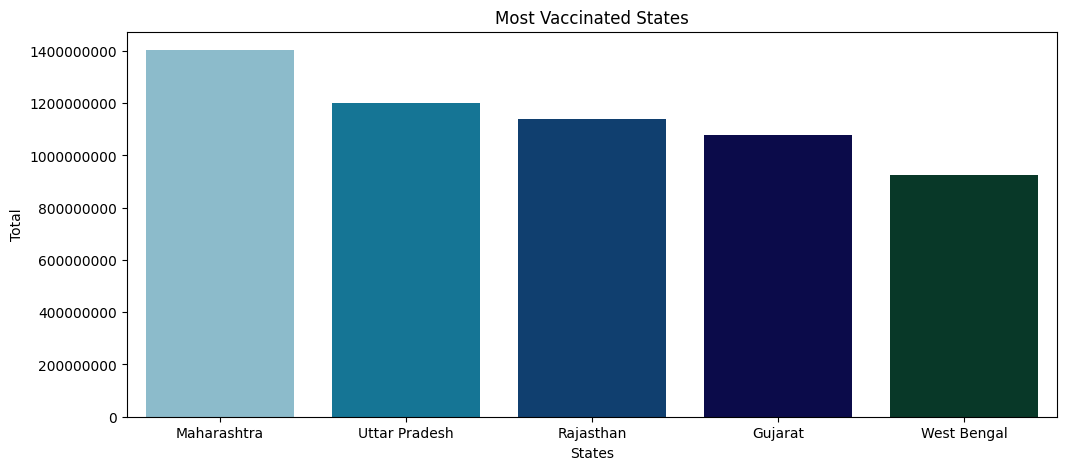

In [77]:
plt.figure(figsize=(12,5))
vc=sns.barplot(data=most_vac.iloc[:5],x='State',y='Total',palette='ocean_r')
vc.ticklabel_format(style='plain',axis='y')
plt.title('Most Vaccinated States')
plt.xlabel('States')
plt.ylabel('Total')
plt.show

## Least Vaccinated States

In [70]:
least_vac=vac.groupby('State')['Total'].sum().to_frame('Total')
least_vac=least_vac.sort_values('Total',ascending=True).head(5)
least_vac

,Total
State,
Lakshadweep,2124715
Andaman and Nicobar Islands,8102125
Ladakh,9466289
Dadra and Nagar Haveli and Daman and Diu,11358600
Sikkim,16136752


/var/folders/bf/gt13gjnx66v6vhck07l9p51c0000gn/T/ipykernel_2017/1136306049.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<function matplotlib.pyplot.show(close=None, block=None)>

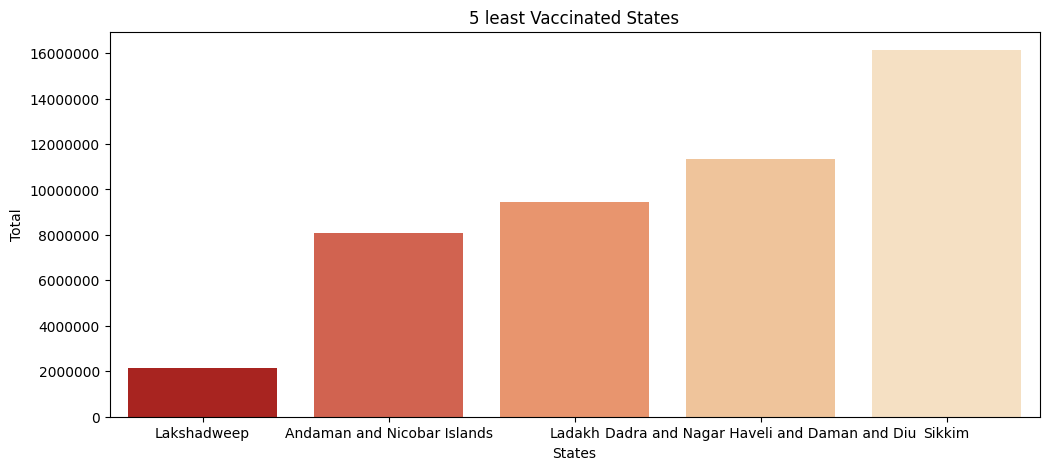

In [75]:
plt.figure(figsize=(12,5))
vc=sns.barplot(data=least_vac,x=least_vac.index,y=least_vac.Total,linewidth=1,palette='OrRd_r')
vc.ticklabel_format(style='plain',axis='y')
plt.title('5 least Vaccinated States')
plt.xlabel('States')
plt.ylabel('Total')
plt.show

### Conclusion:

The Covid-19 data analysis reveals significant variation in both infection rates and vaccination coverage across different Indian states. States like Maharashtra, Kerala, and Karnataka show the highest number of confirmed cases, indicating major population density and exposure challenges. On the other hand, several states show comparatively low vaccination numbers, highlighting gaps in healthcare access, distribution, or awareness.